# Classification Case Study: Titanic Crash Survival
Problem Statement: "Create a Predictive model which can tell whether a given person will survive the Titanic crash or not?"
* Target Variable: Survival
* Predictors: Age, Gender, Tavel Class, Fare etc.

### Exploring the data

In [39]:
# Reading the Titanic Survival Data
# Reading the dataset
import pandas as pd
import numpy as np
TitanicSurvivalData=pd.read_csv('TitanicSurvivalData.csv', encoding='latin')
print('Shape before deleting duplicate values:', TitanicSurvivalData.shape)

# Removing duplicate rows if any
TitanicSurvivalData=TitanicSurvivalData.drop_duplicates()
print('Shape After deleting duplicate values:', TitanicSurvivalData.shape)

TitanicSurvivalData.head(10)
# Start observing the Quantitative/Categorical/Qualitative variables

Shape before deleting duplicate values: (891, 12)
Shape After deleting duplicate values: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [40]:
# Looking at the number of rows and columns
TitanicSurvivalData.shape

(891, 12)

In [41]:
# Observing the summarized information of data
# Data types, Missing values etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
TitanicSurvivalData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


### Removing useless variables from data

In [42]:
# Data Pre Processing
# Deleting those columns which are not useful in predictive analysis because these variables are qualitative
UselessColumns = ['PassengerId','Name','Ticket','Cabin']
TitanicSurvivalData = TitanicSurvivalData.drop(UselessColumns,axis=1)
TitanicSurvivalData.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [43]:
# Looking at the statistial distribution of the data
TitanicSurvivalData.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN


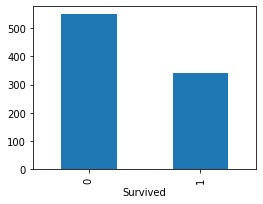

In [44]:
%matplotlib inline
# Creating Bar chart as the Target variable is Categorical
GroupedData=TitanicSurvivalData.groupby('Survived').size()
GroupedData.plot(kind='bar', figsize=(4,3))

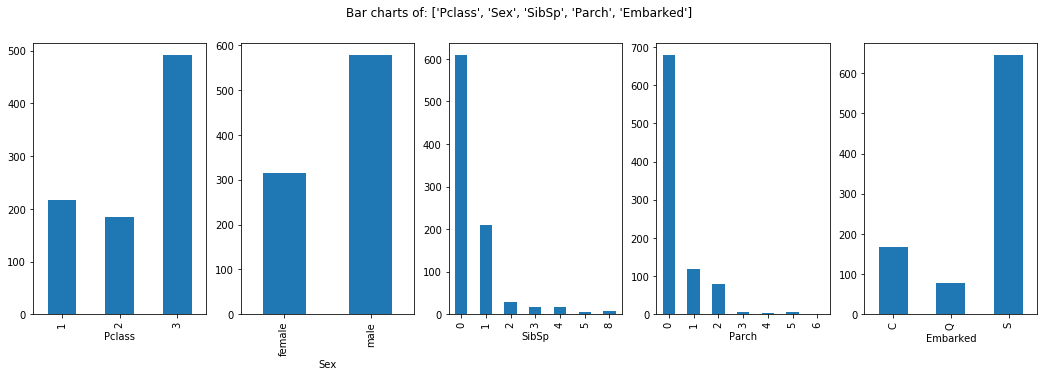

In [45]:
# Plotting multiple bar charts for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(18,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

# Calling the function
PlotBarCharts(inpData=TitanicSurvivalData, colsToPlot=['Pclass', 'Sex','SibSp','Parch','Embarked'])

### Visualize distribution of all the numeric Predictor variables in the data using histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E2C67EDA48>,
      dtype=object)

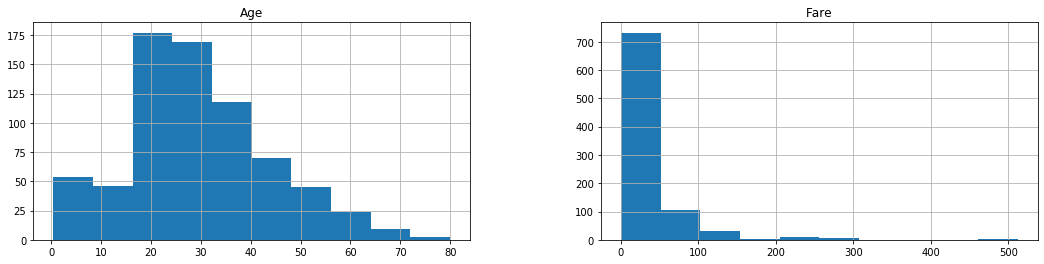

In [46]:
# Plotting histograms of multiple columns together
# Observe that Fare column has outliers
TitanicSurvivalData.hist(['Age', 'Fare'], figsize=(18,4))

#### Visualizing the relation between Survived and Fare using bar charts
We Group by and keep categorical variable in the X-Axis and the continuous variable in the Y-Axis

In [47]:
# Grouping by Categorical variable Survived to find the aggregated values
GroupedData=TitanicSurvivalData.groupby(['Survived'])

# Printing the aggregated values
#GroupedData.size()
#GroupedData.sum()
#GroupedData.count()
GroupedData.mean()

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887
1,1.950292,28.343690,0.473684,0.464912,48.395408


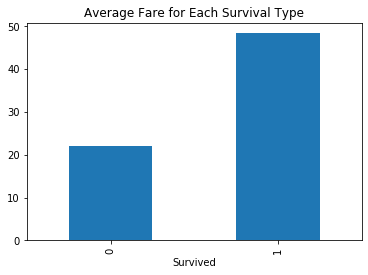

In [48]:
# Creating the graph with Price
# You can observice that many people who survived has paid higher fares!
GroupedData.mean()['Fare'].plot(kind='bar', title='Average Fare for Each Survival Type')

#### Looking at the variances in Fare by each Survival type in box plot
IF the distribution of each type is similar, it gives a hint that there is no correlation Between the categorical and the numeric variable

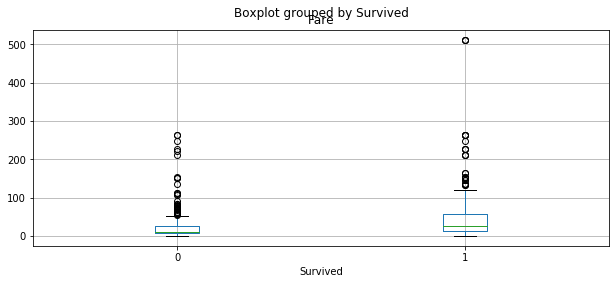

In [49]:
# Box plot for Categorical Variable Survived Vs Continuous Variable Fare
# Observe the outlier in Fare for Survived=1
TitanicSurvivalData.boxplot(column='Fare', by='Survived', figsize=(10,4), vert=True)

In [50]:
# Finding those rows where Fare column has outliers
# All the outlier fares are coming from Pclass=1 which makes sense!
TitanicSurvivalData[TitanicSurvivalData['Fare']>300]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
258,1,1,female,35.0,0,0,512.3292,C
679,1,1,male,36.0,0,1,512.3292,C
737,1,1,male,35.0,0,0,512.3292,C


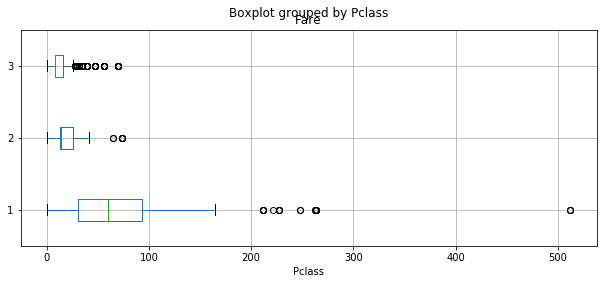

In [51]:
# As the outlier is on the higher side
# We observe what kind of fares have been paid by people travelling in Passenger Pclass=1
# This gives an idea about what is a typical high Fare paid by people
# We replace the Fare of outlier rows with this typical fare value of Class=1
# In this case it seems like Fare=263
TitanicSurvivalData.boxplot(column='Fare', by='Pclass', figsize=(10,4), vert=False)

In [52]:
# Replacing the outlier records of Fare with value 263
TitanicSurvivalData['Fare'][TitanicSurvivalData['Fare']>300] = 263

C:\Users\Vasanth\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### Box plot after Outlier treatment

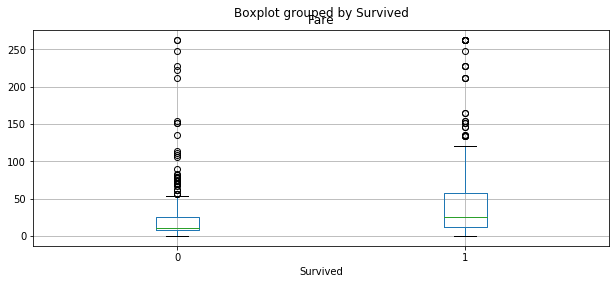

In [53]:
# Observing the relationship with Target variable again after Outlier treatment
# You can see that the distribution has improved now
TitanicSurvivalData.boxplot(column='Fare', by='Survived', figsize=(10,4), vert=True)

In [54]:
# f_oneway() function takes the group data as input and returns F-statistic and P-value
from scipy.stats import f_oneway

# Running the one-way anova test between Fare and Survived
# Assumption(H0) is that Fare and Survived are NOT correlated with each other


Survived_0=TitanicSurvivalData['Fare'][TitanicSurvivalData['Survived']==0]
Survived_1=TitanicSurvivalData['Fare'][TitanicSurvivalData['Survived']==1]

# Performing the ANOVA test
AnovaResults = f_oneway(Survived_0, Survived_1)

# Extreme example when all values are same and the variables are not correlated
#AnovaResults = f_oneway( [10,20], [10,20], [10,20] )

# Extreme example when all the values are different and both variables has correlation
#AnovaResults = f_oneway( [400,500], [7,10], [0.006,0.00001] )

print('P-Value for Anova is: ', AnovaResults[1])

# We accept the Assumption(H0) only when P-Value > 0.05
# Here the P-Value is almost Zero which means we will REJECT the Assumption(H0)
# This means Fare and Survived ARE correlated with each other

P-Value for Anova is:  1.8421954983111479e-16


In [55]:
def anova(data,predictors,target):
    from scipy.stats import f_oneway
    num=data[target].nunique()
    
    for p in predictors:
        l=[]
        for n in num:
            l.append(data[predictors][data[target]==n])
        AnovaResults = f_oneway(Survived_0, Survived_1)
        print('P-Value for Anova is: ', AnovaResults[1])
        
    

In [56]:
# Cross tablulation between two categorical variables
CrossTabResult=pd.crosstab(index=TitanicSurvivalData['Sex'], columns=TitanicSurvivalData['Survived'])
CrossTabResult

Survived,0,1
Sex,,
female,81,233
male,468,109


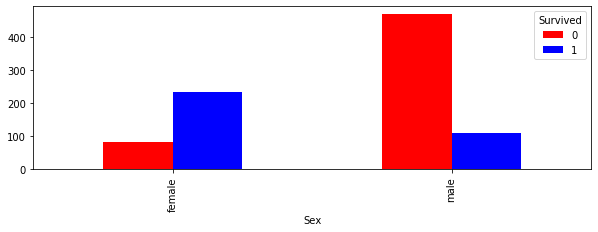

In [57]:
# Visual Inference using Grouped Bar chart
# Notice that Male Suvival rate is very low as compared to Female
CrossTabResult.plot.bar(figsize=(10,3), color=['red','blue'])

In [58]:
from scipy.stats import chi2_contingency

# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrossTabResult)

# P-Value is the Probability of H0 being True
# If P-Value>0.05 then only we Accept the assumption(H0)
# In this case it is way way lower than 0.05 Hence, we reject H0
# this means the two columns are correlated with each other and Gender of a person affects the Survival
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 1.1973570627755645e-58


In [59]:
# Conduct chi-square test for all the categorical variables in the data Vs Target Variable Survived 
# Observe the P-Values for each test

In [60]:
# Extreme example of No correlation between two categorical variables
CrossTabSample=pd.crosstab(pd.Series(['a','a','b','b','b','c']), pd.Series(['d','d']))

# Performing Chi-sq test
ChiSqResultSample =chi2_contingency(CrossTabSample)

# P-Value is the Probability of H0 being True
# If P-Value>0.05 then only Accept the assumption(H0)
# In this case P-Value is Higher than 0.05 Hence, we ACCEPT H0
# This means the two columns are NOT correlated with each other
print('The P-Value of the ChiSq Test is:', ChiSqResultSample[1])

The P-Value of the ChiSq Test is: 1.0


In [61]:
# Finding out how many missing values are present in each column
TitanicSurvivalData.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [62]:
# Code to delete all the missing values at once
# Use this option only when the number of missing value rows are very few
print('Before Deleting missing values:', TitanicSurvivalData.shape)
TitanicSurvivalDataCleaned=TitanicSurvivalData.dropna()
print('After Deleting missing values:', TitanicSurvivalDataCleaned.shape)

Before Deleting missing values: (891, 8)
After Deleting missing values: (712, 8)


In [63]:
# How interpolate works?
numCol = pd.Series([0, 1, np.nan, 3, 4, 5, 6, np.nan, 8])
numCol = pd.Series([0, 5, np.nan, 4, 80, 14, 130, np.nan, 10])
CharCol = pd.Series(['Male', 'Male', np.nan, 'Female', 'Male', 'Female', 'Female', np.nan, 'Male'])

# For categorical data method= 'pad', 'ffill' , 'bfill' etc is used
#print(CharCol.interpolate(method='ffill'))

# For numeric data method= 'linear', 'quadratic' etc is used
numCol.interpolate(method='linear')

0      0.0
1      5.0
2      4.5
3      4.0
4     80.0
5     14.0
6    130.0
7     70.0
8     10.0
dtype: float64

In [64]:
# Treating missing values in each column

############################ Continuous Variables #############################################

# Replacing missing values by interpolation for a numeric variable
TitanicSurvivalData['Age']=TitanicSurvivalData['Age'].interpolate(method='linear')

# Replacing missing values with median value for a numeric variable
#MedianAge=CarPricesData['Age'].median()
#TitanicSurvivalData['Age']=TitanicSurvivalData['Age'].fillna(value=MedianWeight)

############################ Categorical Variables ############################################

# Replacing with interpolation for a categorical variable
TitanicSurvivalData['Embarked']=TitanicSurvivalData['Embarked'].interpolate(method='ffill')

# Replacing with mode value for a categorical variable
#ModeCC=CarPricesData['CC'].mode()[0]
#CarPricesData['CC']=CarPricesData['CC'].fillna(value=ModeCC)

In [65]:
# Every column must have Zero missing values before you proceed futher
TitanicSurvivalData.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [66]:
# Treating nominal variable Sex first, as it is a binary variable.
TitanicSurvivalData['Sex'].replace({'male':1, 'female':0}, inplace=True)
TitanicSurvivalData.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [67]:
# Treating all the nominal variables at once using dummy variables
TitanicSurvivalDataNumeric=pd.get_dummies(TitanicSurvivalData)
TitanicSurvivalDataNumeric.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [68]:
# Saving the processed data as a pickle file
TitanicSurvivalDataNumeric.to_pickle('TitanicSurvivalDataNumeric.pkl')